In [2]:
#import packages
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# To retrieve files/pathnames matching a specified pattern
import glob
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [130]:
# import the necessary packages
import tensorflow
from tensorflow import keras as keras
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import AveragePooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.core import Activation
from tensorflow.keras.optimizers import SGD
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import add
from keras.regularizers import l2
from keras import backend as K
import random
import cv2
from keras.utils.vis_utils import plot_model

In [3]:
pwd

'/Users/user/Desktop/MMAI assignments/DeepLearning'

In [21]:
trainset=[file for file in glob.glob(trainpath+"/*/*")]
testset=[file for file in glob.glob(testpath+"/*/*")]

In [63]:
len(testset)

112

In [23]:
classes =[file for file in glob.glob(trainpath+"/*")]

In [24]:
num_classes=len(classes)
num_classes

28

F TARGET


(400, 400, 3)

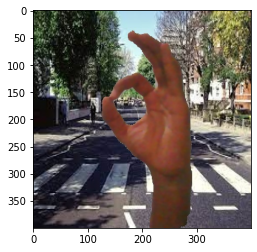

In [52]:
img=cv2.imread(random.choice(testset))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

print(random.choice(testset).split("/")[-2],"TARGET")
img.shape

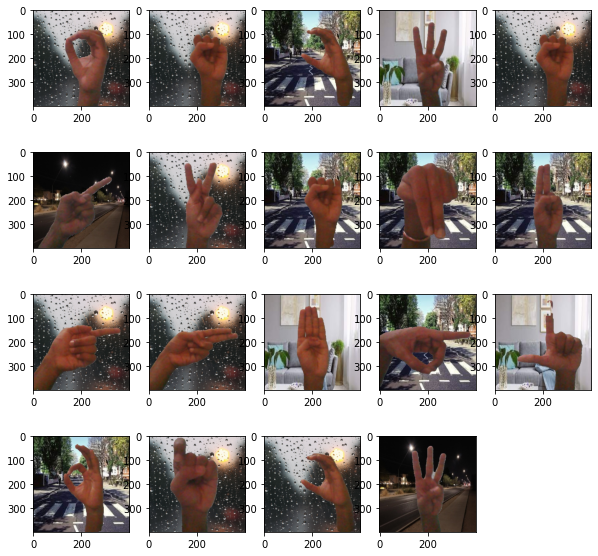

In [72]:
#original images
fig=plt.figure(figsize=(10,10))
columns = 5
rows = 4
for i in range(1, columns*rows):
    img=cv2.imread(random.choice(testset))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [106]:
image_size=200
batch_size=32

In [116]:
# X_training data from a directory
# Sub-directory in that directory will be used as a class for each object
train_datagen = ImageDataGenerator(validation_split=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='reflect',
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   rescale=1.0/255.0
                                   )

test_datagen = ImageDataGenerator(validation_split=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='reflect',
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   rescale=1.0/255.0
                                   )

In [141]:
train_generator = train_datagen.flow_from_directory(
                        directory=trainpath,
                        target_size=(image_size,image_size),
                        batch_size=batch_size,
                        class_mode='categorical',
                        color_mode='rgb',
                        shuffle=True)

validation_generator = test_datagen.flow_from_directory(
                        directory=testpath,
                        target_size = (image_size,image_size),
                        batch_size = batch_size,
                        class_mode = 'categorical',
                        color_mode='rgb',
                        shuffle=True)


Found 112 images belonging to 28 classes.
Found 112 images belonging to 28 classes.


In [84]:
112/16

7.0

In [85]:
len(train_generator.next())

2

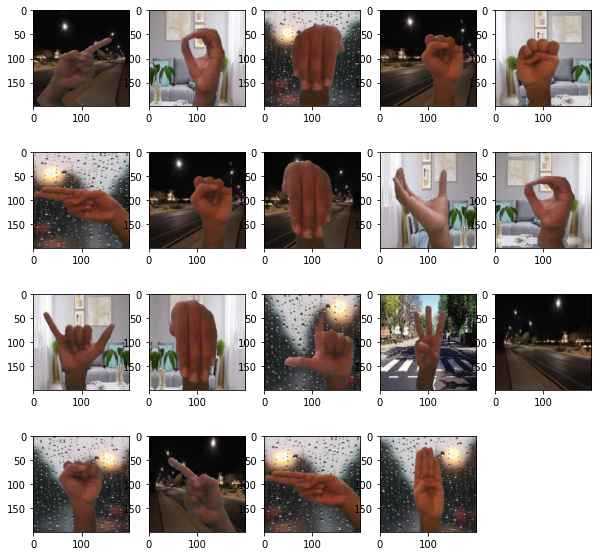

In [97]:
#agumented images
x_batch, y_batch = train_generator.next()
fig=plt.figure(figsize=(10,10))
columns = 5
rows = 4
for i in range(1, columns*rows):
    num = np.random.randint(batch_size)
    image =(( x_batch[num])*255).astype(np.int32)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image)
plt.show()

In [ ]:
#checking normalised

In [88]:
np.mean(train_generator.next()[0]),np.min(train_generator.next()[0]),np.max(train_generator.next()[0])

(0.3791358, 0.0, 1.0)

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_60 (Conv2D)          (None, 200, 200, 64)      1792      
                                                                 
 conv2d_61 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 100, 100, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_62 (Conv2D)          (None, 100, 100, 128)     73856     
                                                                 
 conv2d_63 (Conv2D)          (None, 100, 100, 128)     147584    
                                                           

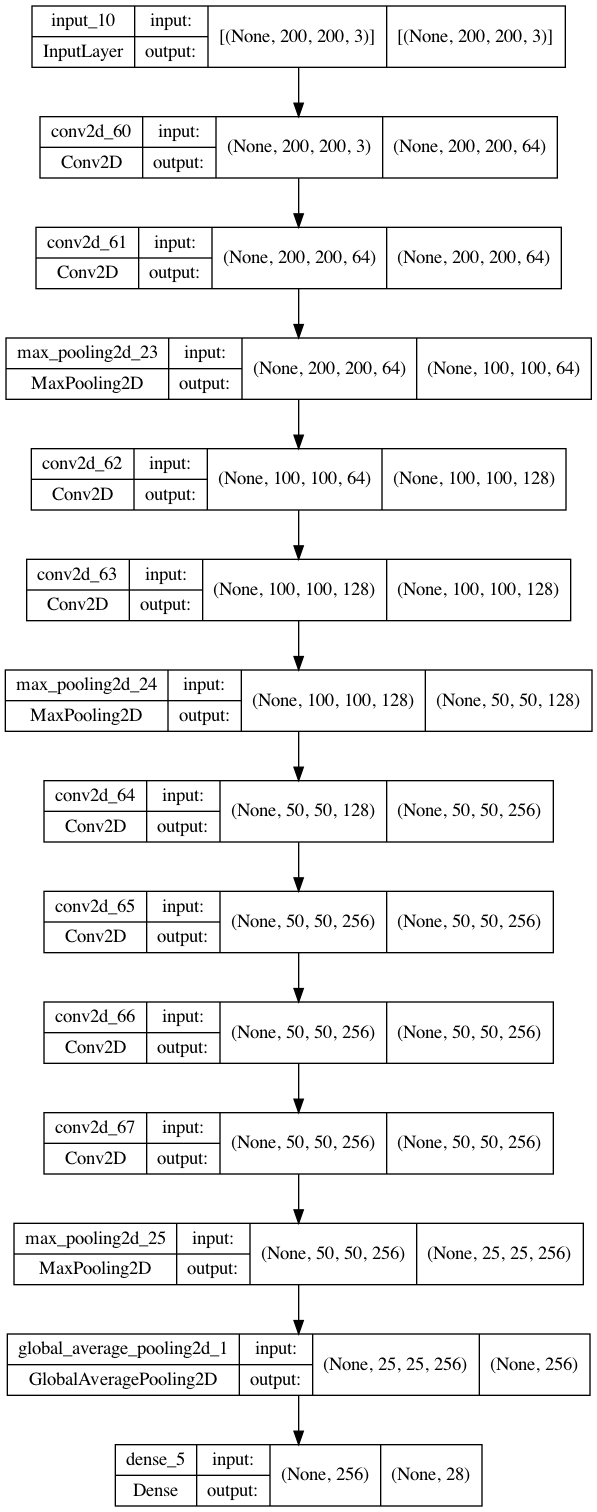

In [132]:
# function for creating a vgg block
def vgg_block(layer_in, no_filters,no_conv):
    # add convolutional layers
    for _ in range(no_conv):
        layer_in = Conv2D(no_filters, (3,3), padding='same', activation='relu')(layer_in)
    layer_in = MaxPooling2D((2,2),strides =(2,2))(layer_in)
    return layer_in

# define model input
inputs =Input(shape =(200,200,3))
# add vgg module
layer =vgg_block(inputs,64,2)
# add vgg module
layer = vgg_block(layer, 128, 2)
# add vgg module
layer = vgg_block(layer, 256, 4)


layer=GlobalAveragePooling2D()(layer)
#layer= Flatten()(layer)
#layer = Dense(1024, activation='relu')(layer)
layer = Dense(28, activation='softmax')(layer)

# create model
model = Model(inputs=inputs, outputs=layer)
# summarize model
model.summary()
# plot model architecture
plot_model(model, show_shapes=True)

In [142]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      mode='min',
                                                      min_delta=0,
                                                      patience=0,
                                                      restore_best_weights=True)

In [143]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Start the training process
model.fit(train_generator,
        callbacks=early_stopping,
        validation_data = validation_generator,
        verbose=2,
        epochs=1)

# Resnet Architecture

A key innovation in the ResNet was the residual module. The residual module, specifically the identity residual model, is a block of two convolutional layers with the same number of filters and a small filter size where the output of the second layer is added with the input to the first convolutional layer. Drawn as a graph, the input to the module is added to the output of the module and is called a shortcut connection.

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_25 (InputLayer)          [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_111 (Conv2D)            (None, 200, 200, 64  1792        ['input_25[0][0]']               
                                )                                                                 
                                                                                                  
 conv2d_112 (Conv2D)            (None, 200, 200, 64  36928       ['conv2d_111[0][0]']             
                                )                                                          

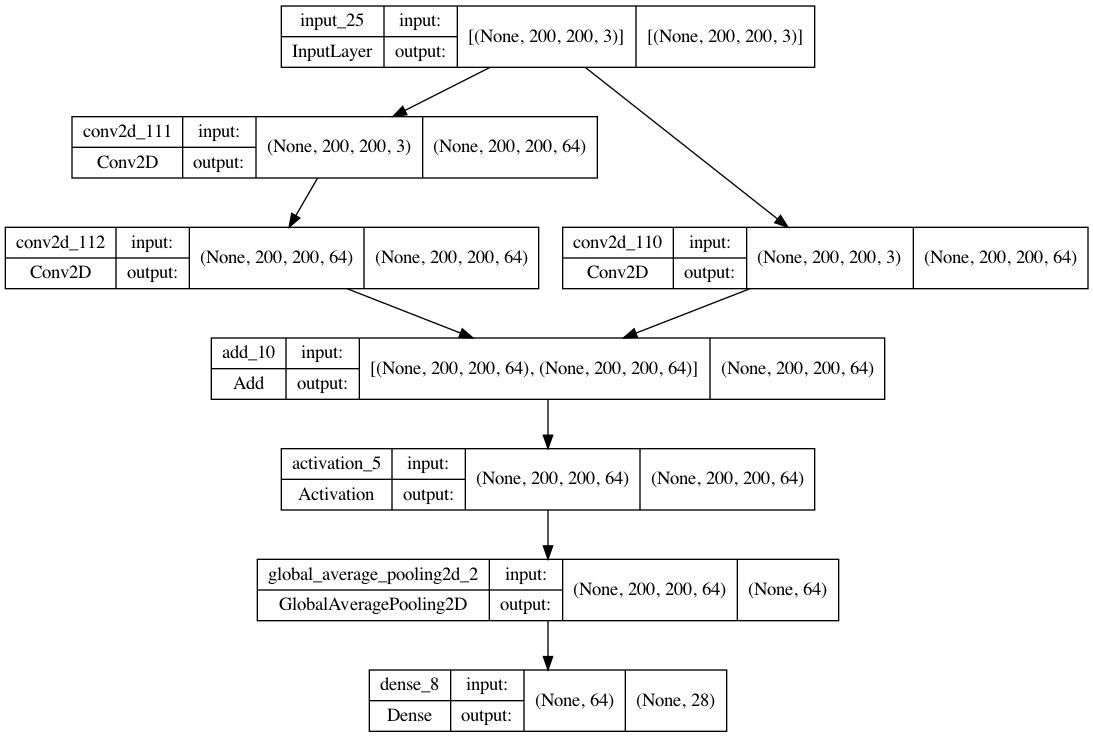

In [177]:
def residual_module(layer_in,no_filters):
    
    merge_input = layer_in
    #check if the number of filters needs to be increase, assumes channels last format
    if layer_in.shape[-1] != no_filters:
        merge_input = Conv2D(no_filters, (1,1), padding='same', activation='relu', \
                             kernel_initializer='he_normal')(layer_in)
    
    #Conv layers using layer_in as input
    conv1 = Conv2D(no_filters, (3,3), padding ='same', activation ='relu', kernel_initializer='he_normal')(layer_in)
    conv2 = Conv2D(no_filters, (3,3), padding ='same', activation ='relu', kernel_initializer='he_normal')(conv1)
    
    #layer out adds : Input  and output of the conv block
    layer_out= add([conv2,merge_input])
    
    # activation function
    layer_out = Activation('relu')(layer_out)
    
    return layer_out


#Send in the inputs shape of train data
inputs = Input(shape=(200,200,3))

#create the 1st resnet block
layer1 = residual_module(inputs,64)

#flatten the layers
#flatten=Flatten()(layer1)

#can use a globalmax pooling as a way to flatten as well
flatten = GlobalAveragePooling2D()(layer1)

layer2 = Dense(28, activation='softmax')(flatten)

#create model
model= Model(inputs =inputs , outputs = layer2)

model.summary()
# plot model architecture
plot_model(model, show_shapes=True)


In [178]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                                      mode='min',
                                                      min_delta=0,
                                                      patience=0,
                                                      restore_best_weights=True)

In [179]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [180]:
# Start the training process
model.fit(train_generator,
        callbacks=early_stopping,
        validation_data = validation_generator,
        verbose=2,
        batch_size=12,
        epochs=1)

4/4 - 32s - loss: 3.5976 - accuracy: 0.0446 - val_loss: 3.3812 - val_accuracy: 0.0357 - 32s/epoch - 8s/step


# Transfer Learning

In [216]:
#https://keras.io/api/applications/

In [181]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [211]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications import ResNet101V2
#from keras.applications.resnet101V2 import preprocess_input

In [213]:
# add preprocessing layer to the front of VGG
vgg2 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
mobilenet = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
resnet = ResNet101V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 26s 0us/step


In [214]:
#VGG16 example

In [185]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [194]:
# useful for getting number of classes
folders = [file for file in glob.glob(trainpath+"/*")]
len(folders)

28

In [187]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [191]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(trainpath,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(testpath,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 112 images belonging to 28 classes.
Found 112 images belonging to 28 classes.


In [196]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy',tf.keras.metrics.CategoricalAccuracy()]
)

In [197]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=1,
  #steps_per_epoch=len(training_set),
  #validation_steps=len(test_set)
)

<ipython-input-197-865a42aceb15>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


4/4 [==============================] - 78s 23s/step - loss: 4.0804 - accuracy: 0.2232 - categorical_accuracy: 0.2232 - val_loss: 2.7540 - val_accuracy: 0.3214 - val_categorical_accuracy: 0.3214


In [201]:
r.history

{'loss': [4.0804033279418945],
 'accuracy': [0.2232142835855484],
 'categorical_accuracy': [0.2232142835855484],
 'val_loss': [2.753953695297241],
 'val_accuracy': [0.3214285671710968],
 'val_categorical_accuracy': [0.3214285671710968]}

# Compare Models

In [219]:
model_names =['VGG16','VGG19', 'MobileNet', 'ResNet101V2', ]
modelapi=[vgg,vgg2,mobilenet,resnet]

In [241]:
model_categorical_accuracy=[]
model_val_accuracy =[]
model_accuracy=[]

for i in range(len(model_names)):
    for layer in modelapi[i].layers:
        layer.trainable = False
    
    # our layers - you can add more if you want
    x = Flatten()(modelapi[i].output)

    # x = Dense(1000, activation='relu')(x)
    prediction = Dense(len(folders), activation='softmax')(x)

    # create a model object
    model = Model(inputs=modelapi[i].input, outputs=prediction)
    
    model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy',tf.keras.metrics.CategoricalAccuracy()])
    
    
    r = model.fit_generator( training_set,validation_data=test_set,epochs=1, #steps_per_epoch=len(training_set),
  #validation_steps=len(test_set)
                           )
    
    

    model_categorical_accuracy.append(r.history['categorical_accuracy'])
    model_val_accuracy.append(r.history['val_accuracy'])
    model_accuracy.append(r.history['accuracy'])
    
    
    
    

<ipython-input-241-26492954db2d>:24: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator( training_set,validation_data=test_set,epochs=1, #steps_per_epoch=len(training_set),


4/4 [==============================] - 52s 14s/step - loss: 27.7261 - accuracy: 0.1071 - categorical_accuracy: 0.1071 - val_loss: 12.2480 - val_accuracy: 0.4643 - val_categorical_accuracy: 0.4643


In [242]:
import pandas as pd

In [243]:
Results= pd.concat([pd.Series(model_names),pd.Series(model_accuracy),pd.Series(model_val_accuracy),\
          pd.Series(model_categorical_accuracy)]\
            ,axis=1)
Results.columns=["ModelName","Accuracy","Val_Accuracy","Categorical_Accuracy"]
Results

,ModelName,Accuracy,Val_Accuracy,Categorical_Accuracy
0,VGG16,[0.0625],[0.2232142835855484],[0.0625]
1,VGG19,[0.0446428582072258],[0.0803571417927742],[0.0446428582072258]
2,MobileNet,[0.0982142835855484],[0.4285714328289032],[0.0982142835855484]
3,ResNet101V2,[0.1071428582072258],[0.4642857015132904],[0.1071428582072258]


In [145]:
#Appendix  https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/